In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

In [4]:
def some_func(x):
    return 0.01 * x ** 2 + 0.1 * x

def derivative_some_func(x):
    return 0.02 * x + 0.1

In [5]:
x = np.arange(0.0, 20.0, 0.1)
y = some_func(x)

Text(0.5, 1.0, 'numerical differentiation')

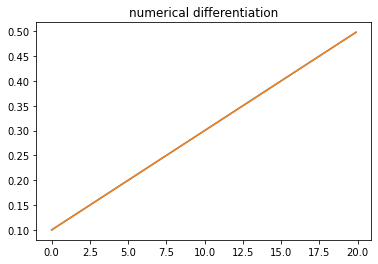

In [6]:
fig, ax = plt.subplots()
ax.plot(x, numerical_diff(some_func, x), label="numerical differentiation")
ax.plot(x, derivative_some_func(x), label="true differentiation")
ax.set_title("numerical differentiation")

# 多変数の勾配
$$
\nabla f(x) = \big(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}\big)
$$

In [7]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp = x[idx]
        # calculation of f(x+h)
        x[idx] = tmp + h
        fxh1 = f(x)
        
        # calculation of f(x-h)
        x[idx] = tmp - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp
        
    return grad

In [8]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad

In [9]:
def multivar_func(x):
    return x[0] ** 2 + x[1] ** 2

In [10]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
X = X.flatten()
Y = Y.flatten()

In [11]:
grad = numerical_gradient(multivar_func, np.array([X, Y]).T).T

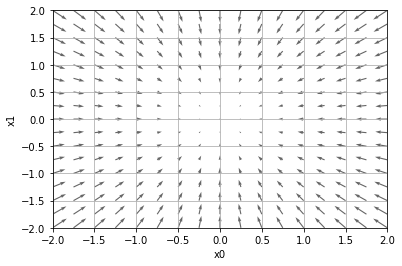

In [12]:
fig, ax = plt.subplots()
ax.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.grid()

# 勾配法

In [20]:
def gradient_descent(f, init_x, learning_rate=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= learning_rate * grad
    return x

In [24]:
init_x = np.array([-3.0, 4.0])
print(f"Terminal point: {gradient_descent(multivar_func, init_x, learning_rate=0.1)}")

0.1
Terminal point: [-6.11110793e-10  8.14814391e-10]


In [26]:
init_x = np.array([-3.0, 4.0])
print(f"Terminal point: {gradient_descent(multivar_func, init_x, learning_rate=1e-10)}")

1e-10
Terminal point: [-2.99999994  3.99999992]
